In [1]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU WITH GPUTEST KERNAL NOT THE USUAL PYTHON3 KERNAL
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 2.0.0
Default GPU Device: /device:GPU:0


In [2]:
import os
import sys
from os import listdir
from os.path import isfile, join
import IPython.display as ipd
import librosa 
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile as wav
import numpy as np
from timeit import default_timer as timer



In [3]:
filename='E:/Thesis/UrbanSound8K/UrbanSound8K/audio/fold3/6988-5-0-4.wav'
ipd.Audio(filename)

In [6]:
def extract_feature(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
   # mfccs=np.mean(librosa.feature.mfcc(audio , sample_rate, n_mfcc=50 ).T, axis=0)
    mels=np.mean(librosa.feature.melspectrogram(audio, sample_rate, n_mels=50, fmax=8000).T, axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate ,n_chroma=50).T,axis=0)
  #  chroma_cq = np.mean(librosa.feature.chroma_cqt(y=audio, sr=sample_rate,n_chroma=40).T,axis=0)
    #chroma_cens = np.mean(librosa.feature.chroma_cens(y=audio, sr=sample_rate,n_chroma=40).T,axis=0)
    
    return mels,chroma_stft

In [7]:
start_time=timer()
filename="E:/Dataset/UrbanSound8K/audio/fold1/101415-3-0-2.wav"
a,b=extract_feature(filename)
end_time=timer()
print('Time take to extract feature from one file: {:.3f}sec'.format((end_time-start_time)/60))

Time take to extract feature from one file: 0.001sec


In [8]:
metadata=pd.read_csv('E:/Dataset/UrbanSound8K/Augmented_metadata/UrbanSound8k_Augmented.csv')
metadata_ori=pd.read_csv('E:/Dataset/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()




,augment,class,class_id,file,fold
0,none,dog_bark,3,100032-3-0-0.wav,5
1,none,children_playing,2,100263-2-0-117.wav,5
2,none,children_playing,2,100263-2-0-121.wav,5
3,none,children_playing,2,100263-2-0-126.wav,5
4,none,children_playing,2,100263-2-0-137.wav,5


In [9]:
fold_list = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [10]:


Augment_list= ['pitch_2', 'pitch_-2','pitch_time290','pitch_time-290','pitch_time2110','pitch_time-2110','speed_90','speed_110']



In [11]:
stacked_features = []
exceptions=0
count=0

start_time = timer()
for i in range(10):
    for j in range(8):
  
        mypath = 'E:/Dataset/UrbanSound8K/Augmented_audio/'+ fold_list[i] + '/' + Augment_list[j] + '/'
        files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]

        for fn in files:
            try: 
                a,b = extract_feature(fn)
                features=np.reshape((np.hstack([a,b])),(20,5))
            
            


            except: 
                print(fn)
                exceptions += 1
                continue

            l_row = metadata.loc[metadata['file']==fn.split('/')[-1]].values.tolist()
            label = l_row[0][-4]
            fold = i+1
            

            stacked_features.append([features, features.shape, label, fold])

            
for i in range(10):
    
    mypath = 'E:/Dataset/UrbanSound8K/audio/'+ fold_list[i] + '/'
    files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
    
    for fn in files:
        try: 
            a,b = extract_feature(fn)
            features=np.reshape((np.hstack([a,b])),(20,5))
            
        except: 
            print(fn)
            exceptions += 1
            continue
            
        l_row = metadata_ori.loc[metadata_ori['slice_file_name']==fn.split('/')[-1]].values.tolist()
        label = l_row[0][-1]
        fold = i+1
    
        stacked_features.append([features, features.shape, label, fold])
        
        
print("Exceptions: ", exceptions)
end_time = timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))
print('Finished feature extraction from all folder')

C:\Users\Admin\Anaconda3\envs\gputest\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_2/.DS_Store


C:\Users\Admin\Anaconda3\envs\gputest\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_-2/.DS_Store
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time290/.DS_Store
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time-290/.DS_Store
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time2110/.DS_Store
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time-2110/.DS_Store
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/speed_90/.DS_Store
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/speed_110/.DS_Store
E:/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_2/.DS_Store
E:/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_-2/.DS_Store
E:/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_time290/.DS_Store
E:/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_time-290/.DS_Store
E:/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_time2110/.DS_Store
E:/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_time-2110/.DS_Store
E:/Dataset/UrbanSound8K/Augmented_audio/fold2/speed_90/.DS_Store
E:/Dataset/UrbanSound8K/Augmented_audio/fo

In [12]:
cols=['Stacked_Features', 'Matrix_Shape', 'Label', 'Fold']
Stacked_feature_pd=pd.DataFrame(data=stacked_features , columns=cols)
Stacked_feature_pd.head()
#Stacked_feature_pd.to_csv('C:/Users/16301148/Desktop/tHESIS/MFCC_features_CNN/MFCC_features_CNN.csv', index=False)

,Stacked_Features,Matrix_Shape,Label,Fold
0,"[[0.0021602071, 0.004981366, 0.013730023, 0.09...","(20, 5)",dog_bark,1
1,"[[0.0024132095, 0.008389344, 0.024350021, 0.16...","(20, 5)",dog_bark,1
2,"[[0.0058781365, 0.005304786, 0.011010458, 0.04...","(20, 5)",dog_bark,1
3,"[[0.023455529, 0.023538116, 0.008813446, 0.009...","(20, 5)",dog_bark,1
4,"[[3.0875337, 0.45785385, 0.15168259, 0.1215507...","(20, 5)",gun_shot,1


In [13]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


X = np.array(Stacked_feature_pd.Stacked_Features.tolist())
y = np.array(Stacked_feature_pd.Label.tolist())


le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

Using TensorFlow backend.


# CNN MODEL WITH FOUR FEATURES STACKING

In [14]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state=42)

In [15]:


print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, yy.shape)



(62870, 20, 5) (15718, 20, 5) (62870, 10) (15718, 10) (78588, 10)


In [16]:
x_train=np.reshape(x_train,(x_train.shape[0], 20,5,1))
x_test=np.reshape(x_test,(x_test.shape[0], 20,5,1))
print(x_train.shape, x_test.shape)

(62870, 20, 5, 1) (15718, 20, 5, 1)


In [17]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics

In [18]:
model=Sequential()
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(20,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))


In [19]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 5, 64)         1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 3, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 3, 128)        204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 2, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [20]:


score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Pre-training accuracy: 14.2448%


In [21]:


start_time=timer()
histroy=model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))
end_time=timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))



Train on 62870 samples, validate on 15718 samples
Epoch 1/30
62870/62870 [==============================] - 7s 105us/step - loss: 1.4556 - accuracy: 0.4894 - val_loss: 1.0076 - val_accuracy: 0.6555
Epoch 2/30
62870/62870 [==============================] - 6s 100us/step - loss: 0.9576 - accuracy: 0.6726 - val_loss: 0.7272 - val_accuracy: 0.7528
Epoch 3/30
62870/62870 [==============================] - 6s 100us/step - loss: 0.7668 - accuracy: 0.7423 - val_loss: 0.5680 - val_accuracy: 0.8047
Epoch 4/30
62870/62870 [==============================] - 6s 100us/step - loss: 0.6578 - accuracy: 0.7767 - val_loss: 0.5120 - val_accuracy: 0.8268
Epoch 5/30
62870/62870 [==============================] - 6s 99us/step - loss: 0.5838 - accuracy: 0.8023 - val_loss: 0.4750 - val_accuracy: 0.8383
Epoch 6/30
62870/62870 [==============================] - 6s 99us/step - loss: 0.5269 - accuracy: 0.8238 - val_loss: 0.3928 - val_accuracy: 0.8655
Epoch 7/30
62870/62870 [==============================] - 6s 99u

In [22]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9731350541114807
Testing Accuracy:  0.950248122215271


In [23]:
def print_prediction(file_name):
    a,b = extract_feature(file_name) 
    prediction_feature=np.reshape(np.vstack((a,b)),(20,5))
            
    prediction_feature = prediction_feature.reshape(1, 20, 5, 1)

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )



In [24]:
filename="E:/Dataset/UrbanSound8K/audio/fold3/6988-5-0-4.wav"
print_prediction(filename)
ipd.Audio(filename)

The predicted class is: engine_idling 

air_conditioner 		 :  0.00000004358845018259671633131802
car_horn 		 :  0.00000000000001378617187720648438
children_playing 		 :  0.00000000175404502034126608123188
dog_bark 		 :  0.00002599963590910192579030990601
drilling 		 :  0.00000020287464508328412193804979
engine_idling 		 :  0.99996316432952880859375000000000
gun_shot 		 :  0.00001044772398017812520265579224
jackhammer 		 :  0.00000000242531195127071441675071
siren 		 :  0.00000000176394887585473725266638
street_music 		 :  0.00000009179593973840383114293218


C:\Users\Admin\Anaconda3\envs\gputest\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [25]:


filename="E:/Dataset/UrbanSound8K/audio/fold6/24364-4-0-0.wav"
print_prediction(filename)
ipd.Audio(filename)



The predicted class is: drilling 

air_conditioner 		 :  0.00000000000000000100298223871711
car_horn 		 :  0.00000000000000002827371824260968
children_playing 		 :  0.00000000027227720078570882833446
dog_bark 		 :  0.00000004721279722730287176091224
drilling 		 :  1.00000000000000000000000000000000
engine_idling 		 :  0.00000000000000000000311355710106
gun_shot 		 :  0.00000000000068256766341465158199
jackhammer 		 :  0.00000000000000872901587573330848
siren 		 :  0.00000000000000000266881490795563
street_music 		 :  0.00000000000005009710975592031323


In [26]:
def prediction(file_name):
    a,b = extract_feature(file_name) 
    prediction_feature=np.reshape(np.vstack((a,b)),(20,5))
            
    prediction_feature = prediction_feature.reshape(1, 20, 5, 1)

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    return predicted_class[0]

In [27]:


filename= "E:/Dataset/UrbanSound8K/audio/fold10/100648-1-0-0.wav"
print_prediction(filename)
ipd.Audio(filename)



The predicted class is: car_horn 

air_conditioner 		 :  0.00001079718276741914451122283936
car_horn 		 :  0.97363531589508056640625000000000
children_playing 		 :  0.00004410561814438551664352416992
dog_bark 		 :  0.00006443552410928532481193542480
drilling 		 :  0.00870267581194639205932617187500
engine_idling 		 :  0.00000300805299957573879510164261
gun_shot 		 :  0.00000130483738303155405446887016
jackhammer 		 :  0.00008350553252967074513435363770
siren 		 :  0.00000068643208805951871909201145
street_music 		 :  0.01745417155325412750244140625000


In [28]:
def plot_accuracy():
    plt.plot(histroy.history['accuracy'])
    plt.plot(histroy.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('No of epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def plot_loss():
    plt.plot(histroy.history['loss'], label='Training')
    plt.plot(histroy.history['val_loss'], label='Testing')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('No of epoch')
    plt.legend(loc="upper left")
    plt.show()

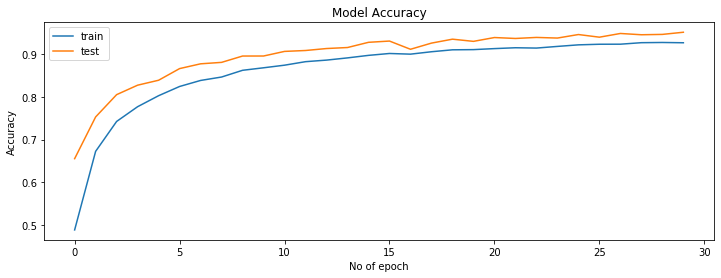

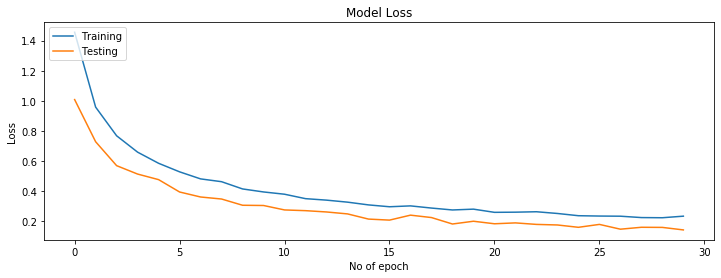

In [29]:
plt.figure(figsize=(12,4))
plot_accuracy()
plt.figure(figsize=(12,4))
plot_loss()

In [30]:
Class_Label = {'Air_conditioner':0, 'Car_horn':1, 'Children_playing':2, 'Dog_Bark':3, 
               'Drilling':4,'Engine_idling':5, 'Gun_Shot' :6, 'Jackhammer': 7 ,'Siren':8,'Street_Music':9 }

In [31]:
from sklearn.metrics import classification_report

y_true = np.argmax(y_test, axis = 1)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
labels = [0,1,2,3,4,5,6,7,8,9]
target_names = Class_Label.keys()

print(y_true.shape, y_pred.shape)
print(classification_report(y_true, y_pred, target_names=target_names))

(15718,) (15718,)
                  precision    recall  f1-score   support

 Air_conditioner       0.96      0.98      0.97      1823
        Car_horn       0.96      0.97      0.97       793
Children_playing       0.87      0.94      0.90      1766
        Dog_Bark       0.97      0.89      0.93      1814
        Drilling       0.97      0.94      0.95      1744
   Engine_idling       0.98      0.98      0.98      1798
        Gun_Shot       0.97      0.96      0.96       693
      Jackhammer       0.94      0.99      0.97      1786
           Siren       0.97      0.93      0.95      1685
    Street_Music       0.95      0.94      0.94      1816

        accuracy                           0.95     15718
       macro avg       0.95      0.95      0.95     15718
    weighted avg       0.95      0.95      0.95     15718



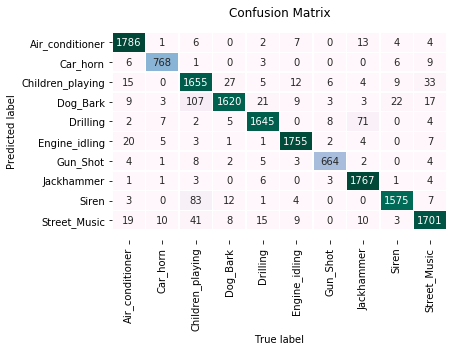

<Figure size 720x288 with 0 Axes>

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax=plt.subplot()
mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,4))
sns.heatmap(mat, square=False, annot=True, fmt='d',cbar=False,linewidths=.5,xticklabels=Class_Label.keys(),yticklabels=Class_Label.keys(), ax=ax, cmap='PuBuGn')
bottom, top= ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top -0.5)
ax.set_title('Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label');


In [33]:


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))



[[1786    1    6    0    2    7    0   13    4    4]
 [   6  768    1    0    3    0    0    0    6    9]
 [  15    0 1655   27    5   12    6    4    9   33]
 [   9    3  107 1620   21    9    3    3   22   17]
 [   2    7    2    5 1645    0    8   71    0    4]
 [  20    5    3    1    1 1755    2    4    0    7]
 [   4    1    8    2    5    3  664    2    0    4]
 [   1    1    3    0    6    0    3 1767    1    4]
 [   3    0   83   12    1    4    0    0 1575    7]
 [  19   10   41    8   15    9    0   10    3 1701]]


In [34]:
def acc_per_class(np_probs_array):    
    accs = []
    for idx in range(0, np_probs_array.shape[0]):
        correct = np_probs_array[idx][idx].astype(int)
        total = np_probs_array[idx].sum().astype(int)
        acc = (correct / total) * 100
        accs.append(acc)
    return accs

In [35]:
accuracies=acc_per_class(mat)
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]

pd.DataFrame({'CLASS':labels, 'ACCURACY': accuracies}).sort_values(by='ACCURACY', ascending=False)

,CLASS,ACCURACY
7,Jackhammer,98.936170
0,Air Conditioner,97.970378
5,Engine Idling,97.608454
1,Car Horn,96.847415
6,Gun Shot,95.815296
4,Drilling,94.323394
2,Children Playing,93.714609
9,Street Music,93.667401
8,Siren,93.471810
3,Dog bark,89.305402


Text(0.5, 1.0, 'Accuracy per Class')

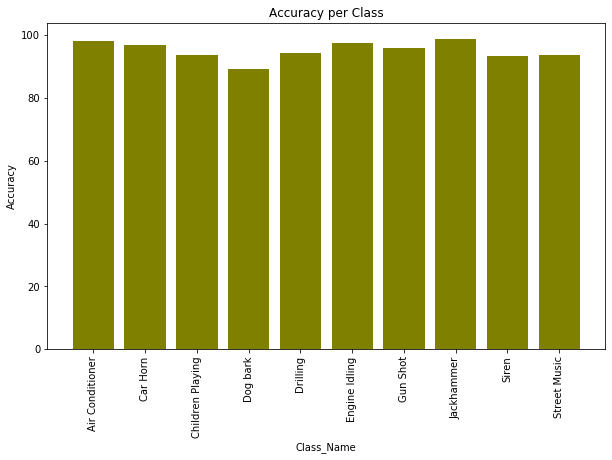

In [36]:
Y=np.around(accuracies , decimals=1)
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]
index=np.arange(len(labels))
plt.figure(figsize=(10,6))
plt.bar(index, Y, color='olive')
plt.xticks(index, labels, rotation=90)
plt.xlabel('Class_Name')
plt.ylabel('Accuracy')
plt.title('Accuracy per Class')